# Music Producers Gender Distribution

## Querying a SPARQL endpoint with SPARQLWrapper library

We are using the SPARQLWrapper library to execute a SPARQL query against the Wikidata SPARQL endpoint. The query aims to count the number of distinct people who have a profession of record producer and group the result by gender. First we import the necessary libraries, SPARQLWrapper and pprint. The variable wikidata_endpoint is set to the Wikidata SPARQL endpoint URL, which is used as the target of the SPARQL query. The variable my_SPARQL_query contains the SPARQL query that will be executed from the Wikidata SPARQL endpoint. The query filters to only include people, gets their gender and profession, and sets the language of the labels to English. The results are then grouped by gender, sorted by the number of individuals in each group, and returned in a JSON format. We used the pp library to print the results in a readable format.

In [3]:
from SPARQLWrapper import SPARQLWrapper, JSON
import pprint as pp

wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"


my_SPARQL_query = """
SELECT DISTINCT ?gendername (COUNT(?person) AS ?totResult)
WHERE
{
       ?person wdt:P31 wd:Q5 ;
              wdt:P21 ?gender ;
              wdt:P106/wdt:P279* wd:Q183945. 
       ?gender rdfs:label ?gendername .
        SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en" . }
       FILTER (lang(?gendername) = 'en')
}
GROUP BY ?gendername
ORDER BY DESC(?totResult)
"""

sparql_wd = SPARQLWrapper(wikidata_endpoint)
sparql_wd.setQuery(my_SPARQL_query)
sparql_wd.setReturnFormat(JSON)
totalResults = sparql_wd.query().convert()

Then we are looping through the bindings of the totalResults variable. For each result in the bindings, it extracts the gender and total count from the result, and stores them in the musicProducers dictionary. The gender is used as the key and the total count as the value. It also appends the total count to the totNumber list. Then it prints out the number of music producers for each gender. After the loop, it calculates the total number of all music producers by summing up the numbers in the totNumber list, and adds this value to the musicProducers dictionary with key 'totResult'. The final step is to create a new dictionary called final_json and add the musicProducers dictionary as the value for the "producers" key. The final_json is printed using the pprint library.

In [4]:
musicProducers = dict()  #producer
totNumber = list()   #totNumber

for result in totalResults["results"]["bindings"]:
    gender = result["gendername"]["value"]
    total = result["totResult"]["value"]
    musicProducers[gender] = total
    totNumber.append(int(total))
    print("Number of " + gender + " music producers is " + total)
    
allProducers = sum(totNumber)
musicProducers['totResult'] = str(allProducers)
print("Number of all music producers is " + str(allProducers))

final_json = dict()
final_json["producers"] = musicProducers
pp.pprint(musicProducers)

Number of male music producers is 14995
Number of female music producers is 962
Number of trans woman music producers is 9
Number of non-binary music producers is 7
Number of genderfluid music producers is 1
Number of genderqueer music producers is 1
Number of intersex music producers is 1
Number of trans man music producers is 1
Number of all music producers is 15977
{'female': '962',
 'genderfluid': '1',
 'genderqueer': '1',
 'intersex': '1',
 'male': '14995',
 'non-binary': '7',
 'totResult': '15977',
 'trans man': '1',
 'trans woman': '9'}


In [5]:
import json

with open("musicProducers.json", "w") as outfile:
    json.dump(final_json, outfile)

# Wordcloud visualization

We created a word cloud visualization. We first create a list of word, which in this case is a string of text containing the words 'male', 'female', 'trans woman', 'non-binary', 'trans man', 'intersex', 'genderfluid' and 'genderqueer' separated by space. We then create an object of the WordCloud class and set the width, height, and margin of the image. We call the generate() method on the object and pass in the text, this will generate the word cloud based on the text. We use the plt.imshow() method to display the generated image. We use plt.axis("off") to remove the axis from the graph and plt.margins(x=0, y=0) to set the margins to 0. Finally, we use plt.show() to display the word cloud.

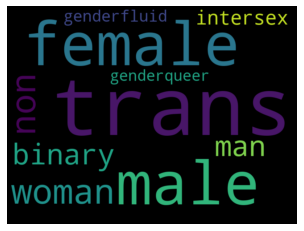

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
# text=("Python Python Python Matplotlib")
text = ('male female trans woman non-binary trans man intersex genderfluid genderqueer')

# Create the wordcloud object
wordcloud = WordCloud(width=800, height=600, margin=20).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## Nationality of female producers

# Will be fixed

We used the SPARQLWrapper library to execute a SPARQL query from the Wikidata SPARQL endpoint. The query aims to count the number of distinct females who have a profession of record producer and group the result by country. We set the endpoint URL for the Wikidata SPARQL endpoint in the variable wikidata_endpoint. The variable top_nation contains the SPARQL query that will be executed from the Wikidata SPARQL endpoint. We use ?human wdt:P106 wd:Q183945 and wdt:P21 wd:Q6581072 to filter the results to only include women music producers . We use wdt:P27 ?country to get the country of the person. The query uses GROUP BY ?countryLabel to group the results by country and it uses ORDER BY DESC(?total) to sort the results in descending order of the number of people in each country. We set the query to sparql_wd using the setQuery() method. The format of the returned result is set to JSON using the setReturnFormat() method. The query is executed and the results are returned in a JSON format and assigned to the variable top_nation_result.

In [31]:
wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

top_nation = '''
SELECT ?countryLabel (COUNT(?human) AS ?total)

WHERE 
{ 
  ?human wdt:P21 wd:Q6581072; 
         wdt:P106 wd:Q183945; 
         wdt:P27 ?country
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
GROUP BY ?countryLabel 
ORDER BY DESC(?total)
LIMIT 10
'''

# set the endpoint 
sparql_wd = SPARQLWrapper(wikidata_endpoint)
# set the query
sparql_wd.setQuery(top_nation)
# set the returned format
sparql_wd.setReturnFormat(JSON)
# get the results
top_nation_result = sparql_wd.query().convert()


## Creating a CSV file from the initial data

We created a CSV file and then using that CSV file to create a dataframe and plot a bar chart.

The first section of code is creating a CSV file named 'countryProducers.csv' with the column names 'Country' and 'Number'. It is then using a for loop to iterate through a list called "top_nation_result" and writing the values of "countryLabel" and "total" to the CSV file, with each iteration of the loop creating a new row in the file.

The next section is using the pandas library to read the CSV file and create a dataframe named 'df'. It then prints the first 10 rows of the dataframe using the .head() function.

Then the code is calculating the sum of the 'Number' column in the dataframe and using that value to calculate the percentage of each value in the 'Number' column and then creating a new column 'Percentage' in the dataframe and storing the calculated percentage in it.

After that, it is rounding the percentage values to 2 decimal places and printing the first 10 rows of the dataframe again.

Finally, the code is using the Matplotlib library to plot a bar chart of the dataframe, with the x-axis being the 'Country' column and the y-axis being the 'Percentage' column. It's also adding title, x and y labels to the chart and then showing the plot.

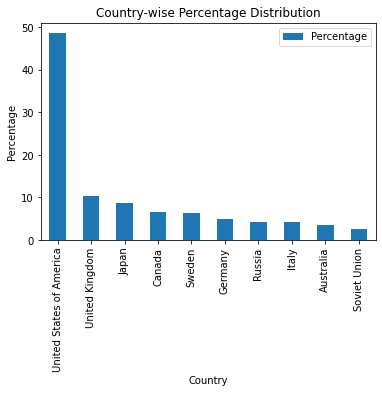

In [32]:
#create CSV
import pandas as pd
import csv

with open('countryProducers.csv', mode='w') as my_file:
    my_writer = csv.writer(my_file, delimiter=',', quoting=csv.QUOTE_ALL)
    # write the column names
    my_writer.writerow(['Country', 'Number'])
    for result in top_nation_result ["results"]["bindings"]:
        my_writer.writerow([result["countryLabel"]["value"], result["total"]["value"].strip()])
        
# parse the csv into a dataframe
df = pd.read_csv("countryProducers.csv")


# print the first 10 rows
df.head(10)

sum = df['Number'].sum()

percentage = (df['Number']/sum)*100

    
df['Percentage']= percentage

df['Percentage']= df['Percentage'].round(decimals = 2)

#print the first 20 rows
df.head(10)


import matplotlib.pyplot as plt

# Bar chart visualization
df.plot(x='Country', y='Percentage', kind='bar')

# Adding title and labels
plt.title('Country-wise Percentage Distribution')
plt.xlabel('Country')
plt.ylabel('Percentage')

# Show the plot
plt.show()

## Pie Chart visualization of the same data

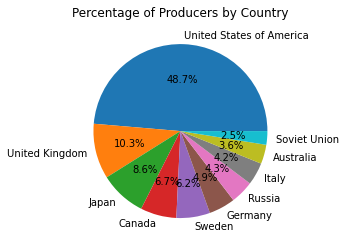

In [33]:
import matplotlib.pyplot as plt

# create a pie chart
plt.pie(df['Percentage'], labels=df['Country'], autopct='%1.1f%%')

# add title
plt.title('Percentage of Producers by Country')

# show the chart
plt.show()


# Songwriters by gender

In [39]:
my_SPARQL_query2 = """
SELECT DISTINCT ?gendername (COUNT(?person) AS ?tResult)
WHERE
{
       ?person wdt:P31 wd:Q5 ;
              wdt:P21 ?gender ;
              wdt:P106/wdt:P279* wd:Q753110. 
       ?gender rdfs:label ?gendername .
        SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en" . }
       FILTER (lang(?gendername) = 'en')
}
GROUP BY ?gendername
ORDER BY DESC(?tResult)
"""

sparql_wd = SPARQLWrapper(wikidata_endpoint)
sparql_wd.setQuery(my_SPARQL_query2)
sparql_wd.setReturnFormat(JSON)
totalResults2 = sparql_wd.query().convert()

In [40]:
musicWriters = dict()  #writer
totNumber2 = list()   #totNumber2

for result in totalResults2["results"]["bindings"]:
    gender = result["gendername"]["value"]
    total = result["tResult"]["value"]
    musicWriters[gender] = total
    totNumber2.append(int(total))
    print("Number of " + gender + " song writers is " + total)
    
allWriters = sum(totNumber2)
musicWriters["tResult"] = str(allWriters)
print("Number of all song writers is " + str(allWriters))

final_json2 = dict()
final_json2["songWriters"] = musicWriters
pp.pprint(musicWriters)

Number of male song writers is 31661
Number of female song writers is 11363
Number of non-binary song writers is 51
Number of trans woman song writers is 36
Number of genderfluid song writers is 12
Number of trans man song writers is 12
Number of genderqueer song writers is 6
Number of travesti song writers is 3
Number of cisgender female song writers is 1
Number of cisgender male song writers is 1
Number of agender song writers is 1
Number of intersex song writers is 1
Number of transgender song writers is 1


TypeError: 'numpy.int64' object is not callable

In [ ]:
percentage_writers = {}
for gender, count in musicWriters.items():
    if gender != "tResult":
        percentage_writers[gender] = (int(count) / allWriters) * 100
print(percentage_writers)

## Women composers by country

In [28]:
wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

top_nation = '''
SELECT ?person ?personLabel ?countryLabel

WHERE {
  ?person wdt:P31 wd:Q5.
  ?person wdt:P106 wd:Q36834.
  ?person wdt:P21 wd:Q6581072.
  ?person wdt:P27 ?country.
          
      SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}

'''

# set the endpoint 
sparql_wd = SPARQLWrapper(wikidata_endpoint)
# set the query
sparql_wd.setQuery(top_nation)
# set the returned format
sparql_wd.setReturnFormat(JSON)
# get the results
# top_nation_result = sparql_wd.query().convert()
female_composers_by_country = sparql_wd.query().convert()


In [29]:
# Initialize an empty dictionary to store the cleaned data
cleaned_data = {}

# Iterate through the results and extract the person and country information
for result in results:
    person = result['personLabel']['value']
    country = result['countryLabel']['value']
    if country not in cleaned_data:
        cleaned_data[country] = []
    cleaned_data[country].append(person)

# Save the cleaned data to a JSON file
with open("fcomposer_country.json", "w") as json_file:
    json.dump(cleaned_data, json_file)

pp.pprint(cleaned_data)

{'Abbasid Caliphate': ['Inan'],
 'Afghanistan': ['Aryana Sayeed',
                 'Seeta Qasemi',
                 'Sonita Alizadeh',
                 'Paradise Sorouri'],
 'Albania': ['Elina Duni',
             'Elvana Gjata',
             'Lejla Agolli',
             'Donika Rudi',
             'Arilena Ara',
             'Dhora Leka',
             'Dua Lipa',
             'Migen Selmani'],
 'Algeria': ['Zaho',
             'Cheikha Rabia',
             'Fella El Djazairia',
             'Hassiba Amrouche',
             'Massa Bouchafa',
             'Malika Makouf Rasmussen',
             'Amina Cadelli',
             'Amel Zen',
             'Nadia Boumerdassi'],
 'Andorra': ['Natàlia Solà i Salvà'],
 'Angola': ['Aline Frazão', 'Ary', 'Hildegarda Oliveira'],
 'Archbishopric of Salzburg': ['Anna Mozart', 'Cäcilia Eberlin'],
 'Archduchy of Austria': ['Caterina Cavalieri'],
 'Argentina': ['Victoria Maurette',
               'Cecilia Pillado',
               'María Elena Walsh',
     

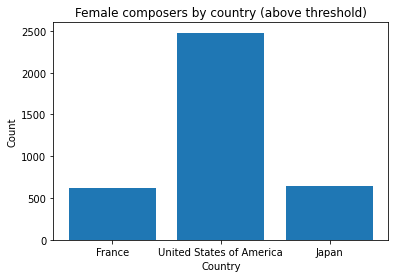

In [31]:
import matplotlib.pyplot as plt


# Define a threshold for the number of occurrences
threshold = 500

# Create a dictionary to store the countries that meet the threshold
countries_above_threshold = {
    country: count for country, count in count_by_country.items() if count >= threshold
}

# Create the bar chart
plt.bar(countries_above_threshold.keys(), countries_above_threshold.values())
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Female composers by country (above threshold)")

# Show the chart
plt.show()

## Women Composers by Country (coordinates for visualization)

In [24]:
from SPARQLWrapper import SPARQLWrapper, JSON
import pprint as pp

wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"


my_SPARQL_query = """
SELECT DISTINCT ?person ?personLabel ?countryLabel ?coords

WHERE {
  ?person wdt:P31 wd:Q5.
  ?person wdt:P106/wdt:P279* wd:Q158852.
  ?person wdt:P21 wd:Q6581072.
  ?person wdt:P27 ?country.
  ?country wdt:P625 ?coords.
 
          
      SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}

"""

sparql_wd = SPARQLWrapper(wikidata_endpoint)
sparql_wd.setQuery(my_SPARQL_query)
sparql_wd.setReturnFormat(JSON)
geoResult = sparql_wd.query().convert()

In [20]:
data = {}
for item in geoResult["results"]["bindings"]:
    person = item["personLabel"]["value"]
    country = item["countryLabel"]["value"]
    coords = item["coords"]["value"]
    if coords:
        coords = coords.split("(")[1].split(")")[0].split(" ")
        lat, long = coords[0], coords[1]
    else:
        lat, long = None, None
    if person not in data:
        data[person] = {"country": country, "latitude": lat, "longitude": long}

In [27]:
with open("coordinates.json", "w") as f:
    json.dump(data, f)